# Gridding Gravity Point Data

### This notebook grids gravity data from southwest Wyoming. 
Data was digitized from Bankey and Kulik 1985
https://pubs.er.usgs.gov/publication/ofr85536

This first cell installs our favorite gridding package verde
https://www.fatiando.org/verde/v1.0.0/index.html

In [ ]:
! pip install verde

Next let's import some packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import verde as vd
%matplotlib inline

First step is reading in the data with pandas, selecting a subset, and visually inspecting the data head

In [2]:
stations = pd.read_csv(r'gravitystations.csv', encoding = "ISO-8859-1")
wyoming  = stations[stations['latitude']>=41] #next let's select data with latitude greater than 41

In [3]:
wyoming.head()

,station,latitude,longitude,elevation,observed,theoretical,terrain,bouger,curv,special,freeair,complete_bouger
0,SW166,42.157167,-109.150000,7065,979693.64,980362.23,0.57,240.97,1.51,0,-4.43,-246.34
1,SW167,42.141333,-109.138500,6920,979693.08,980360.8,0.39,236.02,1.52,0,-17.19,-254.34
2,SW168,42.129667,-109.180000,7150,979677.61,980359.75,0.95,243.87,1.51,0,-10.00,-254.43
3,SW169,42.122000,-109.179833,7035,979686.14,980359.05,0.18,239.94,1.52,0,-11.58,-252.86
4,SW170,42.134667,-109.198333,7075,979684.91,980360.2,0.32,241.31,1.51,0,-10.20,-252.70


Looks pretty good to me, now let's visualize the data in a scatter plot and see where they sampled

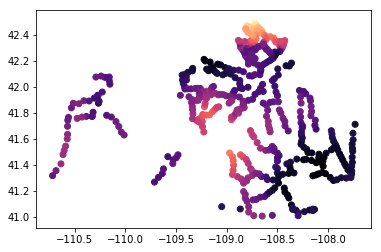

In [4]:
plt.scatter(wyoming.longitude, wyoming.latitude, c=wyoming.complete_bouger, cmap='magma') #plots the spatial location of sample points

Now let's create a spline with verde and then fit it to the `complete_bouger` variable

In [5]:
spline = vd.Spline() #create the spline
spline.fit((wyoming['longitude'], wyoming['latitude']), wyoming['complete_bouger']) #fit the spline to the data

Spline(damping=None, engine='auto',
    force_coords=(array([-109.15   , -109.1385 , ..., -110.6855 , -110.71933]), array([42.15717, 42.14133, ..., 41.35467, 41.31583])),
    mindist=1e-05)

With the spline created, next we just have to create the grid. You can change the spacing and see
what happens with the resulting plot

Text(0.5, 1.0, 'Southwest Wyoming Complete Bouger Gravity')

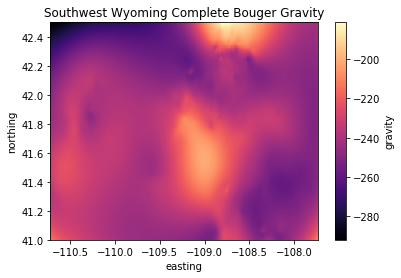

In [6]:
grid = spline.grid(spacing=0.005,data_names=["gravity"]) #creating the grid
grid.gravity.plot.pcolormesh(cmap="magma") #plot up the grid
plt.title('Southwest Wyoming Complete Bouger Gravity') #add a title to the plto

Now that we have a grid, let's look at the 500k geologic map of the area and visually compare the two. We can see the Rock Springs uplift corresponds to the lighter colored anomaly in the middle of the plot. 

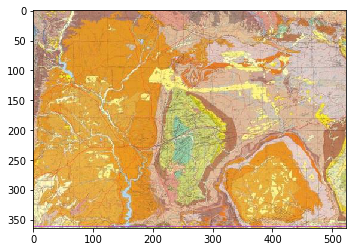

In [7]:
import matplotlib.image as mpimg
img=mpimg.imread('geologicmap.jpg')
imgplot = plt.imshow(img)

This notebook is licensed as CC-BY, use and share to your hearts content.